## Initialize and Sort/Clean Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
sns.set_theme(style='ticks')

xlsx = pd.ExcelFile('Track_Project.xlsx')
df_warholm_s = pd.read_excel(xlsx, sheet_name='W_Splits')
df_benjamin_s = pd.read_excel(xlsx, sheet_name='B_Splits')
df_dossantos_s = pd.read_excel(xlsx, sheet_name='DS_Splits')
df_warholm_c = pd.read_excel(xlsx, sheet_name='W_Cumulative')
df_benjamin_c = pd.read_excel(xlsx, sheet_name='B_Cumulative')
df_dossantos_c = pd.read_excel(xlsx, sheet_name='DS_Cumulative')

In [2]:
df_w_splits = df_warholm_s.copy().assign(Athlete='Warholm')
df_b_splits = df_benjamin_s.copy().assign(Athlete='Benjamin')
df_ds_splits = df_dossantos_s.copy().assign(Athlete='Dos Santos')
df_splits = pd.concat([df_w_splits,df_b_splits,df_ds_splits],axis=0)
df_splits = df_splits.sort_values(by='Time')

athlete_order = ['Warholm','Benjamin','Dos Santos']

In [3]:
all_columns = ['H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','Run in']
start_phase_columns = ['H1','H2','H3','H4']
mid_phase_columns = ['H5','H6','H7']
end_phase_columns = ['H8','H9','H10','Run in']
df_splits['Start_Phase'] = df_splits[start_phase_columns].mean(axis=1)
df_splits['Mid_Phase'] = df_splits[mid_phase_columns].mean(axis=1)
df_splits['End_Phase'] = df_splits[end_phase_columns].mean(axis=1)

### Phases of Race by Athlete Line Chart

Text(0.55, 4.71, 'End Phase (H8-End)')

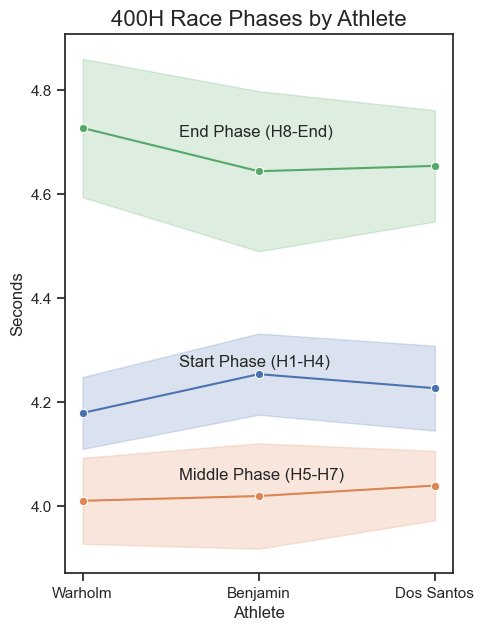

In [4]:
fig, ax = plt.subplots(figsize=([5,7]))
sns.set_theme(style='ticks')
sns.lineplot(data=df_splits,x='Athlete',y='Start_Phase', errorbar='sd',marker='o')
sns.lineplot(data=df_splits,x='Athlete',y='Mid_Phase', errorbar='sd',marker='o')
sns.lineplot(data=df_splits,x='Athlete',y='End_Phase', errorbar='sd',marker='o')
plt.ylabel('Seconds')
plt.title('400H Race Phases by Athlete',fontsize=16)
plt.text(0.55,4.269,'Start Phase (H1-H4)', fontsize=12)
plt.text(0.55,4.05,'Middle Phase (H5-H7)', fontsize=12)
plt.text(0.55,4.71,'End Phase (H8-End)', fontsize=12)

### Phases Time Variance (Detailed)

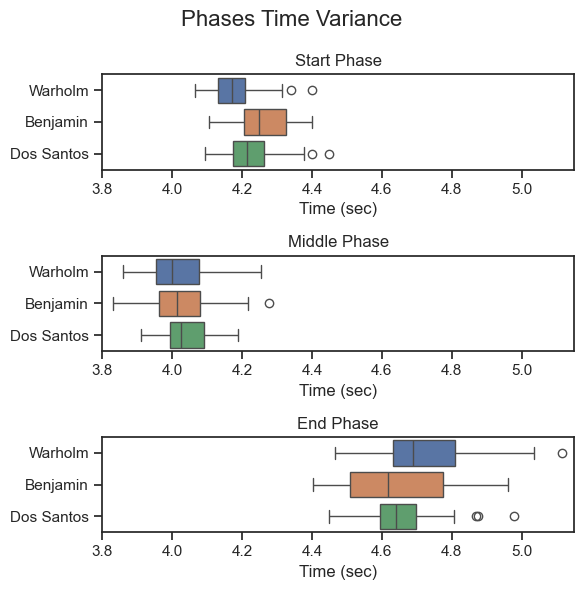

In [6]:
fig, ax = plt.subplots(3,figsize=(6,6))
sns.boxplot(data=df_splits,x='Start_Phase',y='Athlete',ax=ax[0],hue='Athlete')
ax[0].set_ylabel('')
ax[0].set_xlabel('Time (sec)')
ax[0].set_title('Start Phase')
ax[0].set_xlim(3.8,5.15)
sns.boxplot(data=df_splits,x='Mid_Phase',y='Athlete',ax=ax[1],hue='Athlete')
ax[1].set_ylabel('')
ax[1].set_xlabel('Time (sec)')
ax[1].set_title('Middle Phase')
ax[1].set_xlim(3.8,5.15)
sns.boxplot(data=df_splits,x='End_Phase',y='Athlete',ax=ax[2],hue='Athlete')
ax[2].set_ylabel('')
ax[2].set_xlabel('Time (sec)')
ax[2].set_title('End Phase')
ax[2].set_xlim(3.8,5.15)
fig.suptitle('Phases Time Variance',fontsize=16)
fig.tight_layout()

# Warholm is by far the most explosive starter and also the most consistent, while Benjamin is the slowest
# Very even in middle phase but Dos Santos is most consistent while Warholm is generally the fastest
# Benjamin takes the win in the end, Dos Santos close behind with a few outliers, Warholm closes slowest with one outlier being injury

### Comparing Normal vs Changed Stride Patterns

In [7]:
df_warholm_s_normal = df_w_splits[df_w_splits['Stride Pattern']=='13 to 9 15 to 10']
df_benjamin_s_normal = df_b_splits[df_b_splits['Stride Pattern']=='13 to 10']
df_dossantos_s_normal = df_ds_splits[df_ds_splits['Stride Pattern']=='13 to 2 12 to 6 13 to 10']
df_splits_normal = pd.concat([df_warholm_s_normal,df_benjamin_s_normal,df_dossantos_s_normal],axis=0)

df_warholm_s_off = df_w_splits[df_w_splits['Stride Pattern']!='13 to 9 15 to 10']
df_benjamin_s_off = df_b_splits[df_b_splits['Stride Pattern']!='13 to 10']
df_dossantos_s_off = df_ds_splits[df_ds_splits['Stride Pattern']!='13 to 2 12 to 6 13 to 10']
df_splits_off = pd.concat([df_warholm_s_off,df_benjamin_s_off,df_dossantos_s_off],axis=0)

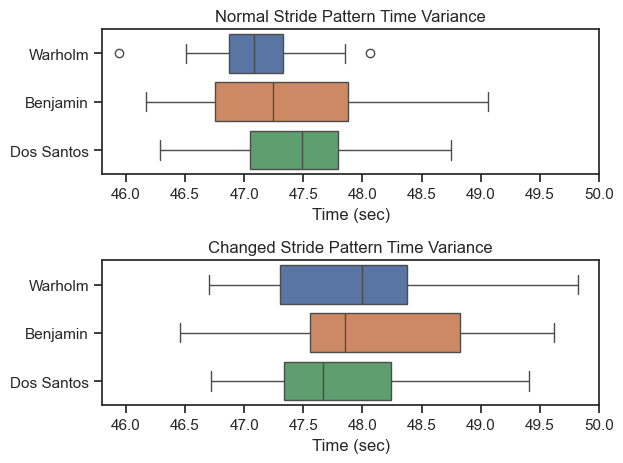

In [8]:
fig, ax = plt.subplots(2)
sns.boxplot(data=df_splits_normal,x='Time',y='Athlete',ax=ax[0],hue='Athlete')
ax[0].set_ylabel('')
ax[0].set_xlabel('Time (sec)')
ax[0].set_title('Normal Stride Pattern Time Variance')
ax[0].set_xlim(45.8,50)
sns.boxplot(data=df_splits_off,x='Time',y='Athlete',ax=ax[1],hue='Athlete')
ax[1].set_ylabel('')
ax[1].set_xlabel('Time (sec)')
ax[1].set_title('Changed Stride Pattern Time Variance')
ax[1].set_xlim(45.8,50)
fig.tight_layout()

# All athletes do much better with their practiced stride pattern, they also are generally more consistent (ranges are larger with other patterns)
# Not on chart but all athletes had specific patterns earlier in their careers that changed as they got older
# Dos Santos as he experiments the most and can alternate the best does the best when he is changing his pattern, Warholm does the worst
# Should put number of changed pattern or percent to show who alters their pattern the most

### Hurdle Splits Correlation to Total Time

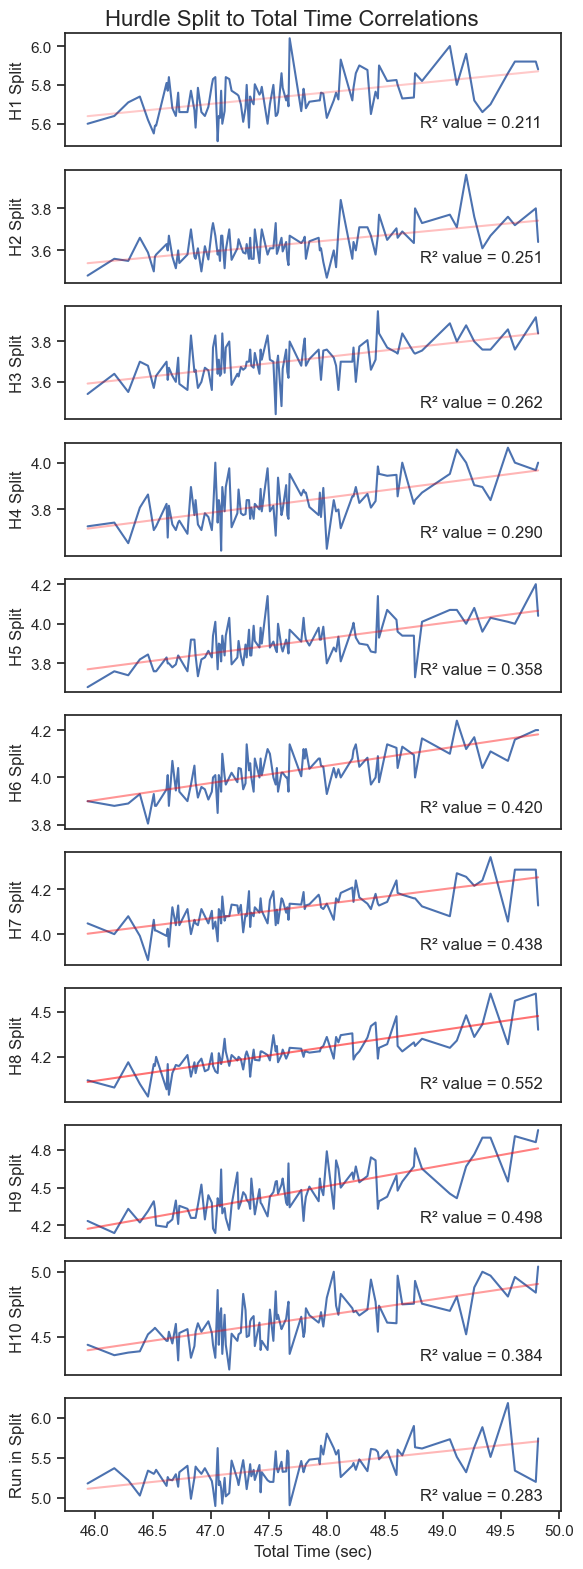

In [9]:
fig, ax = plt.subplots(11,figsize=(6,16))
r_squared_values = {}
for i, column in enumerate(all_columns):
    sns.lineplot(data=df_splits,x='Time',y=column, errorbar=None, ax=ax[i])
    x=df_splits['Time']
    y=df_splits[column]
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    r_squared = r_value**2
    r_squared_values[column] = r_squared
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax[i].text(x=48.8,y=min(y)+0.075,s=f'R² value = {r_squared:.3f}')
    ax[i].set_ylabel(f'{column} Split')
    x_range = np.linspace(x.min(), x.max(), 100)
    y_pred = slope * x_range + intercept
    ax[i].plot(x_range, y_pred, color='red', label='Regression',alpha=r_squared)
    if i != len(all_columns)-1:
        ax[i].set_xticks([])
        ax[i].set_xlabel('')
    else:
        ax[i].set_xlabel('Total Time (sec)')
plt.suptitle("Hurdle Split to Total Time Correlations",fontsize=16)
fig.tight_layout()
plt.show()

# We can see that Hurdle 8, arguably the most crucial, is the one that most correlates with total time (R squared = 0.552). 
# This shows that Hurdle 8 is likely the best test of the athlete's capabilities and strength.
# Hurdles 6, 7, and 9 (R squared values of 0.42, 0.438, and 0.498) are next correlation wise, showing that the back half of the race determines your time. 
# Hurdles 1 and 2 (R squared values of 0.211 and 0.251) correlate the least so it is not over in the beginning.

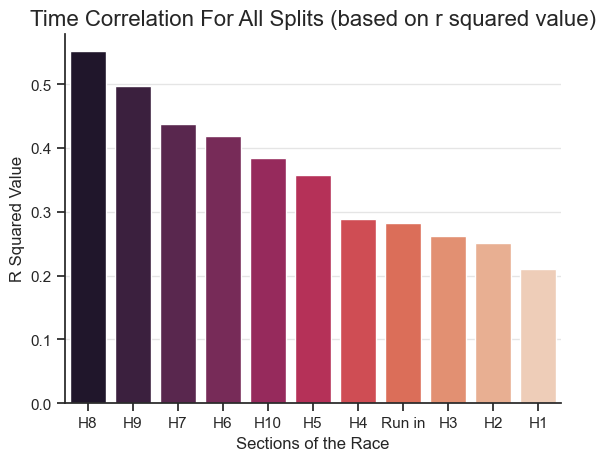

In [10]:
r_squared_sorted = dict(sorted(r_squared_values.items(),key = lambda item: item[1], reverse=True))
sns.barplot(x=list(r_squared_sorted.keys()),y=list(r_squared_sorted.values()),hue=list(r_squared_sorted.keys()),palette='rocket')
sns.despine()
plt.xlabel('Sections of the Race')
plt.ylabel('R Squared Value')
plt.title('Time Correlation For All Splits (based on r squared value)',fontsize=16)
plt.grid(True, axis='y', alpha=0.5)
plt.show()

### Race Map (Splits)

In [11]:
df_w_splits_top20 = df_w_splits.head(20).assign(Athlete='Warholm')
df_b_splits_top20 = df_b_splits.head(20).assign(Athlete='Benjamin')
df_ds_splits_top20 = df_ds_splits.head(20).assign(Athlete='Dos Santos')
df_splits_top20 = pd.concat([df_w_splits_top20,df_b_splits_top20,df_ds_splits_top20],axis=0)
df_splits_top20 = df_splits_top20.sort_values(by='Time')

In [12]:
avg_profiles = df_splits_top20.groupby('Athlete')[all_columns].mean()
avg_profiles = avg_profiles.reset_index().melt(
    id_vars='Athlete',
    var_name='Split',
    value_name='Average Time'
)

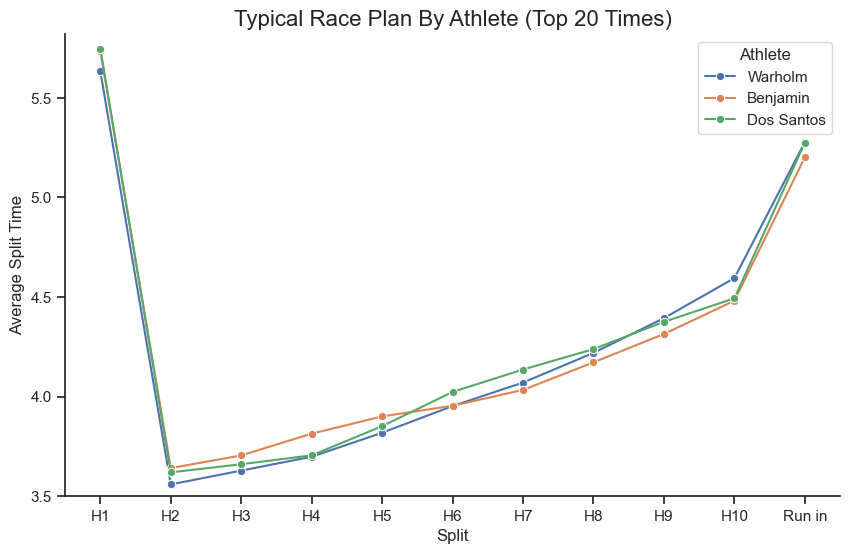

In [108]:
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_profiles, x='Split', y='Average Time', hue='Athlete',marker='o',hue_order=athlete_order)
sns.despine()
plt.ylim(3.5, 5.82)
plt.ylabel('Average Split Time')
plt.title('Typical Race Plan By Athlete (Top 20 Times)',fontsize=16)
plt.show()

### Difference to Dos Santos Graph

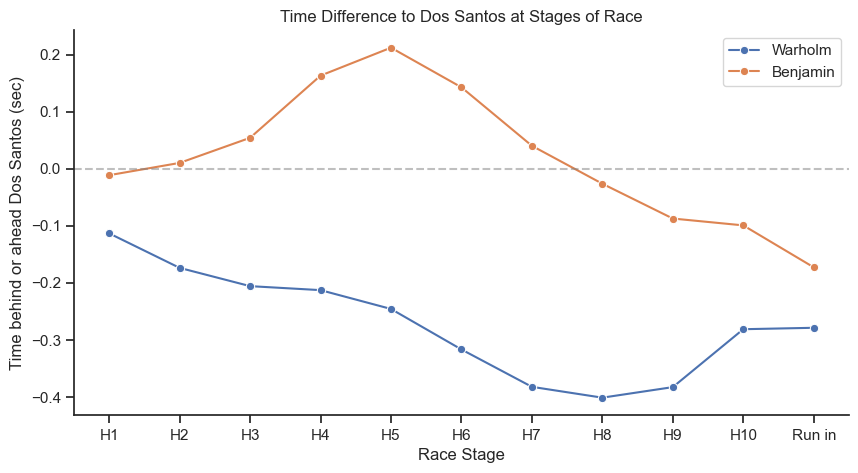

In [148]:
df_w_cumulatives = df_warholm_c.copy().assign(Athlete='Warholm')
df_b_cumulatives = df_benjamin_c.copy().assign(Athlete='Benjamin')
df_ds_cumulatives = df_dossantos_c.copy().assign(Athlete='Dos Santos')

df_w_splits_top20_c = df_w_cumulatives.head(20).assign(Athlete='Warholm')
df_b_splits_top20_c = df_b_cumulatives.head(20).assign(Athlete='Benjamin')
df_ds_splits_top20_c = df_ds_cumulatives.head(20).assign(Athlete='Dos Santos')
df_splits_top20_c = pd.concat([df_w_splits_top20_c,df_b_splits_top20_c,df_ds_splits_top20_c],axis=0)
df_splits_top20_c = df_splits_top20_c.sort_values(by='Time')

avg_profiles_c = df_splits_top20_c.groupby('Athlete')[all_columns].mean()
avg_profiles_c = avg_profiles_c.reset_index().melt(
    id_vars='Athlete',
    var_name='Split',
    value_name='Average Time'
)

avg_profiles_c_pivot = avg_profiles_c.pivot(index='Split',columns='Athlete',values='Average Time').reset_index()
avg_profiles_c_pivot['Warholm'] = avg_profiles_c_pivot['Warholm']-avg_profiles_c_pivot['Dos Santos']
avg_profiles_c_pivot['Benjamin'] = avg_profiles_c_pivot['Benjamin']-avg_profiles_c_pivot['Dos Santos']
avg_profiles_b_gaps = avg_profiles_c_pivot[['Split','Warholm','Benjamin']].melt(
    id_vars='Split',
    var_name='Athlete',
    value_name='Time to Dos Santos (sec)'
)
avg_profiles_b_gaps['Split'] = pd.Categorical(avg_profiles_b_gaps['Split'], categories=all_columns,ordered=True)

fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=avg_profiles_b_gaps,x='Split',y='Time to Dos Santos (sec)',hue='Athlete',hue_order=athlete_order,marker='o')
sns.despine()
plt.axhline(0,color='gray',alpha=0.5,linestyle='--')
plt.xlabel('Race Stage')
plt.title('Time Difference to Dos Santos at Stages of Race')
plt.ylabel('Time behind or ahead Dos Santos (sec)')
h, l = ax.get_legend_handles_labels()
ax.legend(h[0:2],l[0:2])
plt.show()

### Race Strategy Year Over Year

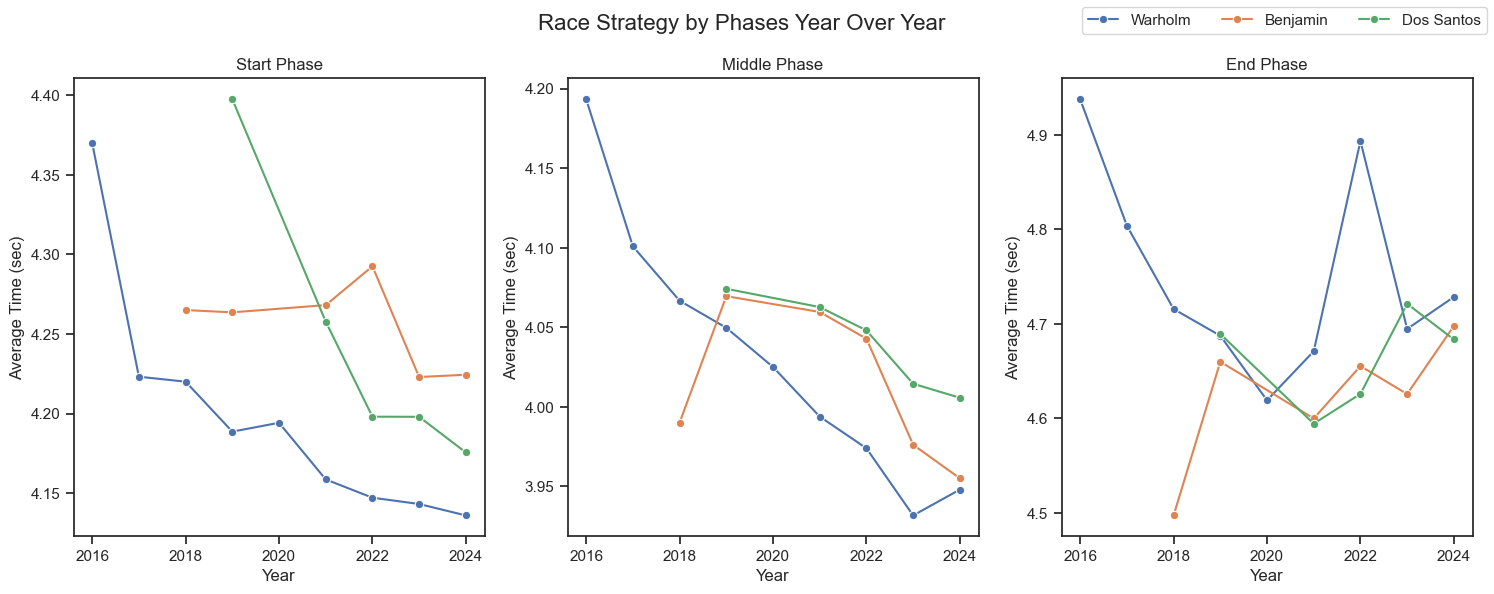

In [67]:
df_splits_2024 = df_splits[df_splits['Year']!=2025]
fig, ax = plt.subplots(1, 3, figsize=(15,6))
sns.lineplot(data=df_splits_2024,x='Year',y='Start_Phase',hue='Athlete',errorbar=None, marker='o', ax=ax[0])
ax[0].set_ylabel('Average Time (sec)')
ax[0].set_title('Start Phase')
ax[0].legend().set_visible(False)
sns.lineplot(data=df_splits_2024,x='Year',y='Mid_Phase',hue='Athlete',errorbar=None, marker='o', ax=ax[1])
ax[1].set_ylabel('Average Time (sec)')
ax[1].set_title('Middle Phase')
ax[1].legend().set_visible(False)
sns.lineplot(data=df_splits_2024,x='Year',y='End_Phase',hue='Athlete',errorbar=None, marker='o', ax=ax[2])
ax[2].set_ylabel('Average Time (sec)')
ax[2].set_title('End Phase')
ax[2].legend().set_visible(False)
handles, labels = ax[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=3)
fig.suptitle('Race Strategy by Phases Year Over Year',fontsize=16)
fig.tight_layout()
plt.show()

### Race Strategy by Race Type

In [53]:
df_splits_finals = df_splits[df_splits['Type']=='final']
df_splits_semis = df_splits[df_splits['Type']=='semi']
df_splits_heats = df_splits[df_splits['Type']=='heat']
df_splits_heats = df_splits_heats.reset_index()
df_splits_heats = df_splits_heats.reindex([0,2, 1, 3,4,5,6,7,8,9,10,11,12,13,14,15])

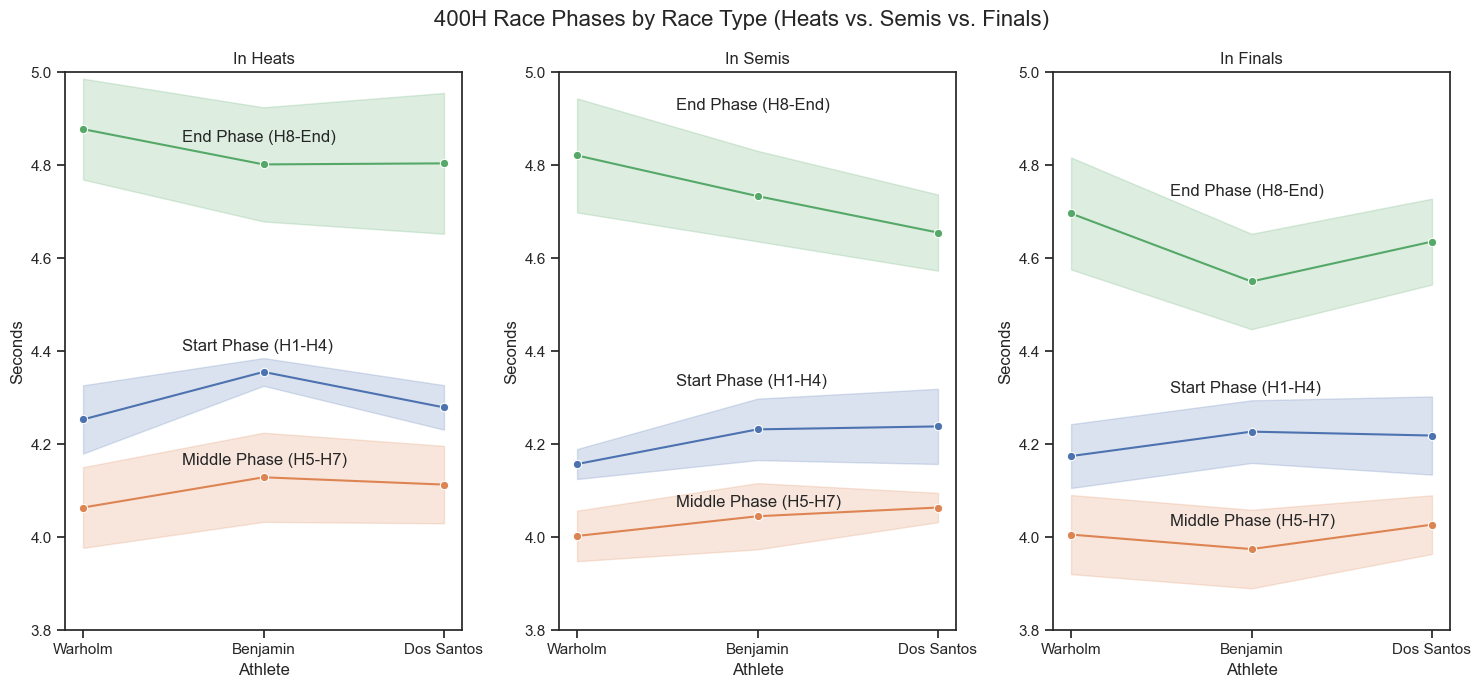

In [27]:
fig, ax = plt.subplots(1,3,figsize=([15,7]))
sns.set_theme(style='ticks')
sns.lineplot(data=df_splits_heats,x='Athlete',y='Start_Phase', errorbar='sd',marker='o',ax=ax[0])
sns.lineplot(data=df_splits_heats,x='Athlete',y='Mid_Phase', errorbar='sd',marker='o',ax=ax[0])
sns.lineplot(data=df_splits_heats,x='Athlete',y='End_Phase', errorbar='sd',marker='o',ax=ax[0])
ax[0].set_ylabel('Seconds')
ax[0].text(0.55,4.4,'Start Phase (H1-H4)', fontsize=12)
ax[0].text(0.55,4.155,'Middle Phase (H5-H7)', fontsize=12)
ax[0].text(0.55,4.85,'End Phase (H8-End)', fontsize=12)
ax[0].set_title('In Heats')
ax[0].set_ylim(3.8,5)
sns.lineplot(data=df_splits_semis,x='Athlete',y='Start_Phase', errorbar='sd',marker='o',ax=ax[1])
sns.lineplot(data=df_splits_semis,x='Athlete',y='Mid_Phase', errorbar='sd',marker='o',ax=ax[1])
sns.lineplot(data=df_splits_semis,x='Athlete',y='End_Phase', errorbar='sd',marker='o',ax=ax[1])
ax[1].set_ylabel('Seconds')
ax[1].text(0.55,4.325,'Start Phase (H1-H4)', fontsize=12)
ax[1].text(0.55,4.065,'Middle Phase (H5-H7)', fontsize=12)
ax[1].text(0.55,4.92,'End Phase (H8-End)', fontsize=12)
ax[1].set_title('In Semis')
ax[1].set_ylim(3.8,5)
sns.lineplot(data=df_splits_finals,x='Athlete',y='Start_Phase', errorbar='sd',marker='o',ax=ax[2])
sns.lineplot(data=df_splits_finals,x='Athlete',y='Mid_Phase', errorbar='sd',marker='o',ax=ax[2])
sns.lineplot(data=df_splits_finals,x='Athlete',y='End_Phase', errorbar='sd',marker='o',ax=ax[2])
ax[2].set_ylabel('Seconds')
ax[2].text(0.55,4.31,'Start Phase (H1-H4)', fontsize=12)
ax[2].text(0.55,4.025,'Middle Phase (H5-H7)', fontsize=12)
ax[2].text(0.55,4.735,'End Phase (H8-End)', fontsize=12)
ax[2].set_title('In Finals')
ax[2].set_ylim(3.8,5)
plt.suptitle('400H Race Phases by Race Type (Heats vs. Semis vs. Finals)',fontsize=16)
fig.tight_layout()
plt.show()

### Stride Consistencies by Year

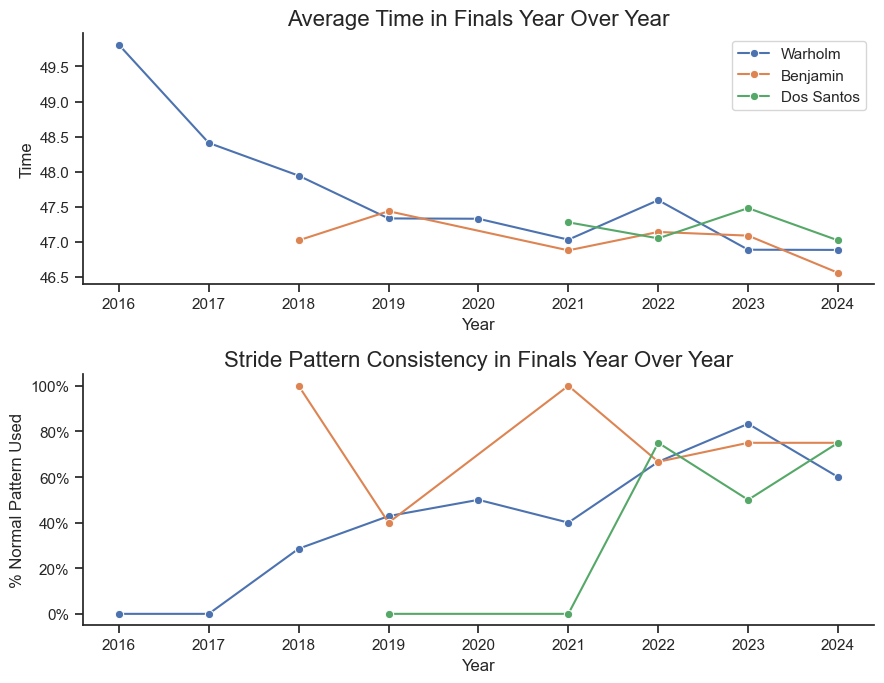

In [95]:
df_splits_stride_sort = df_splits_2024.copy()
normal_patterns = {'Warholm':'13 to 9 15 to 10','Benjamin':'13 to 10','Dos Santos':'13 to 2 12 to 6 13 to 10'}
def stridefunc(row):
    athlete=row['Athlete']
    normal_pattern = normal_patterns[athlete]
    return row['Stride Pattern'] == normal_pattern
df_splits_stride_sort['Normal_Stride'] = df_splits_stride_sort.apply(stridefunc,axis=1)
df_splits_stride_sort_finals = df_splits_stride_sort[df_splits_stride_sort['Type']=='final']
df_stride_percents = df_splits_stride_sort_finals.groupby(['Athlete','Year'])[['Normal_Stride']].mean()
df_stride_percents = df_stride_percents.reset_index()
df_stride_percents = df_stride_percents.reindex([12,0,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21])

df_warholm_s_2024_finals = df_warholm_s[(df_warholm_s['Year']!=2025)&(df_warholm_s['Type']=='final')]
df_benjamin_s_2024_finals = df_benjamin_s[(df_benjamin_s['Year']!=2025)&(df_benjamin_s['Type']=='final')]
df_dossantos_s_2024_finals = df_dossantos_s[(df_dossantos_s['Year']!=2025)&(df_benjamin_s['Type']=='final')]

fig, ax = plt.subplots(2,figsize=(9,7))
sns.lineplot(data=df_warholm_s_2024_finals,x='Year',y='Time', errorbar=None, ax=ax[0], label='Warholm',marker='o')
sns.lineplot(data=df_benjamin_s_2024_finals,x='Year',y='Time', errorbar=None, ax=ax[0], label='Benjamin',marker='o')
sns.lineplot(data=df_dossantos_s_2024_finals,x='Year',y='Time', errorbar=None, ax=ax[0], label='Dos Santos',marker='o')
ax[0].set_title('Average Time in Finals Year Over Year',fontsize=16)

sns.lineplot(data=df_stride_percents,x='Year',y='Normal_Stride',hue='Athlete',ax=ax[1],marker='o')
sns.despine()
ax[1].legend().set_visible(False)
ax[1].set_ylabel('% Normal Pattern Used')
ax[1].set_title('Stride Pattern Consistency in Finals Year Over Year',fontsize=16)
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x*100)}%'))
fig.tight_layout()
plt.show()